<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EC%A0%95%EA%B7%9C%ED%99%94(Regularization)%EC%99%80_%EB%93%9C%EB%A1%AD_%EC%95%84%EC%9B%83(Dropout)%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%EA%B0%9C%EC%84%A0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *
from plotter import *
from dataloader import load_data

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

np.random.seed(100)
tf.random.set_seed(100)

'''
1. 입력층과 출력층은 그대로 사용합니다.
'''

def Develop():

    model = tf.keras.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                  tf.keras.layers.Dense(64),
                  tf.keras.layers.BatchNormalization(),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dropout(0.3),
                  tf.keras.layers.Dense(10, activation='softmax')
                  ])

    return model


'''
2. 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Develop 함수를 이용해 두 모델을 불러옵니다.

   Step02. 모델의 손실 함수, 최적화 알고리즘, 평가 방법을 설정합니다.

   Step03. 모델의 구조를 확인하는 코드를 작성합니다.

   Step04. 모델을 학습시킵니다. 두 모델 모두 'epochs'는 20,
           'batch_size'는 500으로 설정합니다. 검증용 데이터도 설정해주세요.

   Step05. 모델을 테스트하고 accuracy 점수를 출력합니다.
           모델의 성능을 확인해보고, 목표값을 달성해보세요.
'''

def main():

    # Fashion-MNIST 데이터를 불러오고 전처리하는 부분입니다.
    (train_images, train_labels), (test_images, test_labels) = load_data()

    train_images = train_images / 255.0
    test_images = test_images / 255.0

    develop_model = Develop()

    develop_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    develop_model.summary()

    history = develop_model.fit(train_images, train_labels, epochs=20, batch_size=500, validation_data=(test_images, test_labels), verbose=1)

    scores = develop_model.evaluate(test_images, test_labels, verbose=0)

    print('\naccuracy_develop: ', scores[-1])

    Visulaize([('Develop', history)])

    return history

if __name__ == "__main__":
    main()

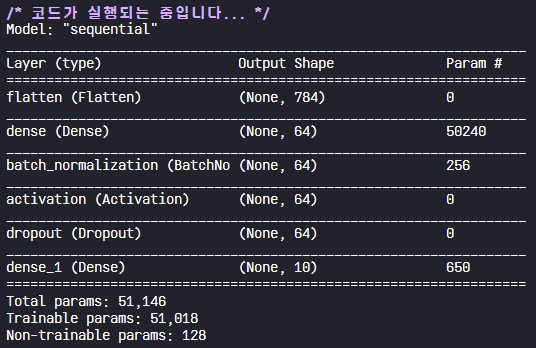

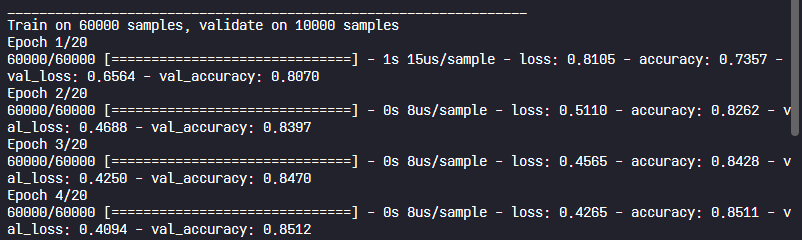

...

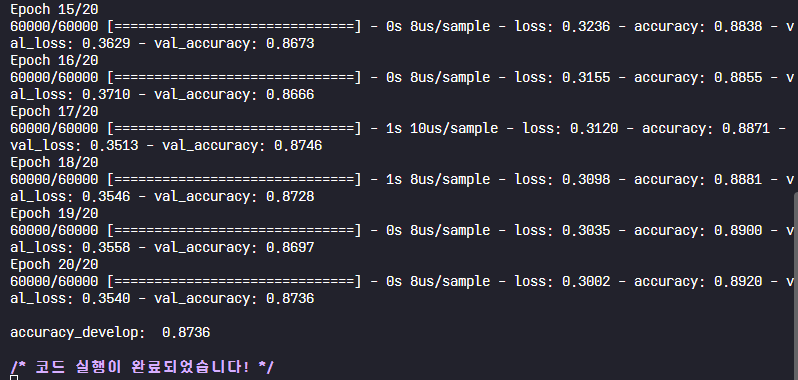

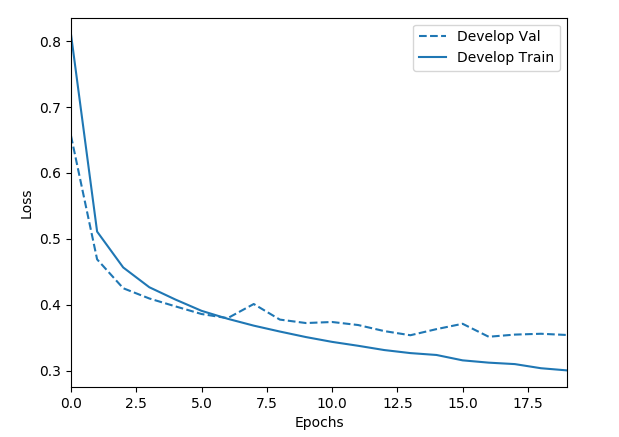